Accuracy: 0.8888888888888888
Precision: 0.898148148148148
Recall: 0.8888888888888888
F1 Score: 0.8877665544332212

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

Cross-validation accuracies: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean CV Accuracy: 0.9600000000000002


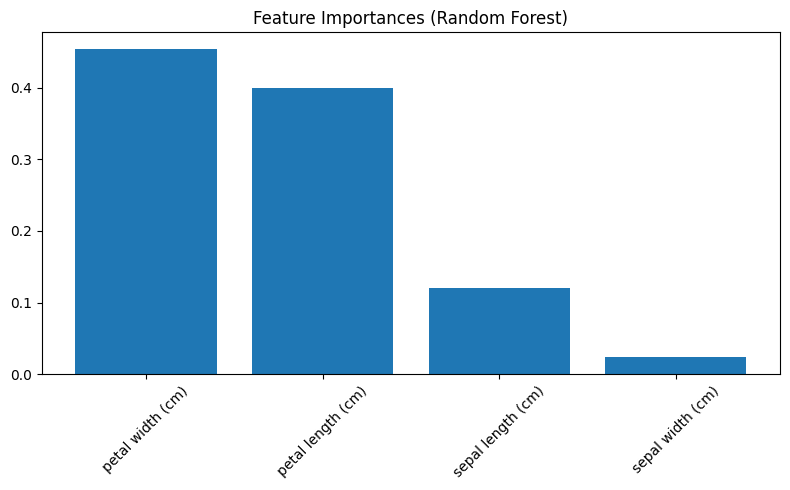

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# loading dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# randomforest function from scikit learn
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Cross-Validating
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = iris.feature_names

plt.figure(figsize=(8,5))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()
